## Import necessary libraries

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

import os

In [3]:
os.getcwd()

'C:\\Users\\praj\\OneDrive - Publicis Groupe\\Documents\\All\\Nov-2020\\Udacity Data Science Nano Degree training\\Project1'

## Import the 3 Airbnb Seattle data files downloaded from Kaggle

In [315]:
calendar = pd.read_csv("C:\\Users\\praj\\OneDrive - Publicis Groupe\\Documents\\All\\Nov-2020\\Udacity Data Science Nano Degree training\\Project1\\calendar.csv")
listings = pd.read_csv("C:\\Users\\praj\\OneDrive - Publicis Groupe\\Documents\\All\\Nov-2020\\Udacity Data Science Nano Degree training\\Project1\\listings.csv")
reviews = pd.read_csv("C:\\Users\\praj\\OneDrive - Publicis Groupe\\Documents\\All\\Nov-2020\\Udacity Data Science Nano Degree training\\Project1\\reviews.csv")

## Performing basic data exploration

##### Checking the contents of these 3 files

In [312]:
calendar.shape

(1393570, 4)

In [6]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [7]:
listings.shape

(3818, 92)

In [8]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [9]:
reviews.shape

(84849, 6)

In [10]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


##### Checking if there are any missing values

In [11]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [12]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

##### Checking number of distinct values in each column to know the primary key in the data

In [13]:
for i in reviews.columns:
    print("# distinct values in", i, "is:", reviews[i].nunique())

# distinct values in listing_id is: 3191
# distinct values in id is: 84849
# distinct values in date is: 1930
# distinct values in reviewer_id is: 75730
# distinct values in reviewer_name is: 14380
# distinct values in comments is: 84136


In [14]:
reviews.shape

(84849, 6)

In [310]:
#Reviews data is hence at the level of id. So, each row in the reviews dataset is a different review entry
#Distinct listings in the listings table is 3818, while the # distinct listing ids in the reviews dataset is 3191. So, it means
#that the reviews of the reamining listings are not available

In [16]:
for i in listings.columns:
    print("# distinct values in", i,"is:", listings[i].nunique())

# distinct values in id is: 3818
# distinct values in listing_url is: 3818
# distinct values in scrape_id is: 1
# distinct values in last_scraped is: 1
# distinct values in name is: 3792
# distinct values in summary is: 3478
# distinct values in space is: 3119
# distinct values in description is: 3742
# distinct values in experiences_offered is: 1
# distinct values in neighborhood_overview is: 2506
# distinct values in notes is: 1999
# distinct values in transit is: 2574
# distinct values in thumbnail_url is: 3498
# distinct values in medium_url is: 3498
# distinct values in picture_url is: 3818
# distinct values in xl_picture_url is: 3498
# distinct values in host_id is: 2751
# distinct values in host_url is: 2751
# distinct values in host_name is: 1466
# distinct values in host_since is: 1380
# distinct values in host_location is: 120
# distinct values in host_about is: 2011
# distinct values in host_response_time is: 4
# distinct values in host_response_rate is: 45
# distinct values

In [17]:
listings.shape

(3818, 92)

In [18]:
for i in calendar.columns:
    print("# distinct values in variable -", i, "is:", calendar[i].nunique())

# distinct values in variable - listing_id is: 3818
# distinct values in variable - date is: 365
# distinct values in variable - available is: 2
# distinct values in variable - price is: 669


In [19]:
calendar.shape

(1393570, 4)

In [20]:
# The day wise information in the calendar table is present for all of the 3818 listings present in the listings dataset
# 365 distinct days are present. So, it looks like information is availale for 1 calendar year

In [21]:
np.min(calendar['date'])

'2016-01-04'

In [22]:
np.max(calendar['date'])

'2017-01-02'

In [311]:
#Based on the minimum and maximum dates, we can say that 
#data in calendar table is present from 4th Jan 2016 to 2nd Jan 2017

## Probing the data with the idea of answering the following 3 business questions:
1. How does the prices of Airbnb hotels in Seattle fluctuate over time?
2. How have the total number of bookings increased over time?
3. What factors have the highest correlation with price of Airbnb Seattle hotels?

##### 1. How does the prices of Airbnb hotels in Seattle fluctuate over time?

To get this information we need to look at the calendar data as calendar data contains the price information by each day for each listing

In [316]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [317]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


As currently, the price has the format 'object' and has the dollar sign in it, we need to remove dollar sign to be able to convert the value into numeric type. We also need to remove commas from the price values

In [7]:
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].str.replace(',', '')

In [8]:
calendar['price'].head(2)

0    85.00
1    85.00
Name: price, dtype: object

In [9]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [10]:
calendar['price'] = pd.to_numeric(calendar['price'], downcast = 'float')

In [11]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0


In [12]:
calendar[['available', 'price']].groupby('available').mean()

,price
available,
f,NaN
t,137.944855


In [17]:
calendar.shape

(1393570, 4)

In [13]:
#This implies that whenever available flat is f, there is no price information available. 
#So, for our analysis in this section, we will only use data when available flag is true

In [18]:
df = calendar[calendar['available'] == 't']

In [19]:
df.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0


In [20]:
calendar.shape

(1393570, 4)

In [21]:
df.shape

(934542, 4)

In [22]:
s = df.groupby('date').mean()['price']

In [23]:
s.shape

(365,)

In [24]:
s

date
2016-01-04    122.085876
2016-01-05    120.681305
2016-01-06    120.928261
2016-01-07    120.958893
2016-01-08    127.640854
                 ...    
2016-12-29    138.045502
2016-12-30    144.738373
2016-12-31    145.698151
2017-01-01    138.126968
2017-01-02    135.572769
Name: price, Length: 365, dtype: float32

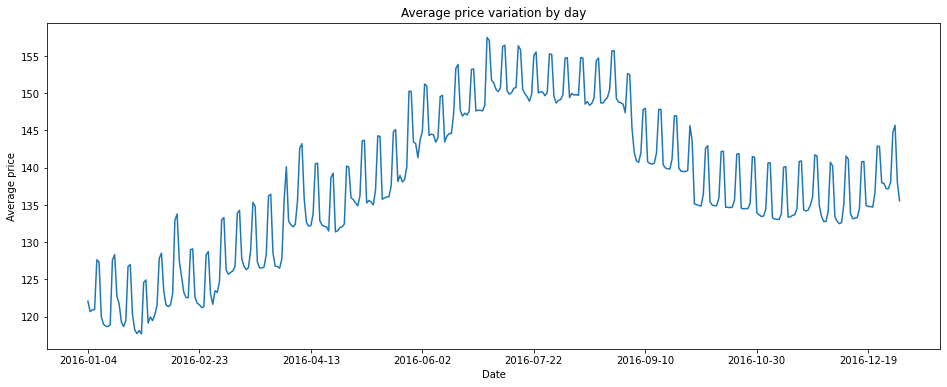

In [25]:
plt.figure(figsize = (16, 6))
s.plot()
plt.xlabel('Date')
plt.ylabel('Average price')
plt.title('Average price variation by day')
plt.show()

In [26]:
#From the above plot it can be interpreted that Average prices are higher in the months of July and Aug compared to rest of year
#Also, prices increase from Jan to July
#Further, there seems to be weekly variation in prices. To understand this further, let's calculate the average price 
#by day of the week

In [27]:
df.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0


Currently, the 'date' field is not of datetime type, so, we extract weekday information from date field, we need to first convert it into datetime type

In [28]:
df['date'] = pd.to_datetime(df['date'])

<ipython-input-28-e8d2d516eb0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [29]:
df['Dayofweek'] = df['date'].dt.dayofweek

<ipython-input-29-9eb8ea0671c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dayofweek'] = df['date'].dt.dayofweek


In [30]:
df.head(7)

,listing_id,date,available,price,Dayofweek
0,241032,2016-01-04,t,85.0,0
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,2
10,241032,2016-01-14,t,85.0,3
14,241032,2016-01-18,t,85.0,0
15,241032,2016-01-19,t,85.0,1
16,241032,2016-01-20,t,85.0,2


In [31]:
df['Dayofweek'].unique()

array([0, 1, 2, 3, 6, 4, 5], dtype=int64)

Assigning appropriate weekdays names to each of the above numeric values

In [32]:
df.loc[df['Dayofweek'] == 0, 'Dayofweek1'] = 'Monday'
df.loc[df['Dayofweek'] == 1, 'Dayofweek1'] = 'Tuesday'
df.loc[df['Dayofweek'] == 2, 'Dayofweek1'] = 'Wednesday'
df.loc[df['Dayofweek'] == 3, 'Dayofweek1'] = 'Thursday'
df.loc[df['Dayofweek'] == 4, 'Dayofweek1'] = 'Friday'
df.loc[df['Dayofweek'] == 5, 'Dayofweek1'] = 'Saturday'
df.loc[df['Dayofweek'] == 6, 'Dayofweek1'] = 'Sunday'

C:\Users\praj\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\praj\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
df.head(3)

,listing_id,date,available,price,Dayofweek,Dayofweek1
0,241032,2016-01-04,t,85.0,0,Monday
1,241032,2016-01-05,t,85.0,1,Tuesday
9,241032,2016-01-13,t,85.0,2,Wednesday


In [34]:
s1 = df.groupby('Dayofweek1').mean()['price'].sort_values()

In [35]:
s1

Dayofweek1
Tuesday      135.408768
Wednesday    135.447876
Monday       135.676407
Sunday       136.459946
Thursday     136.476028
Friday       143.036301
Saturday     143.202133
Name: price, dtype: float32

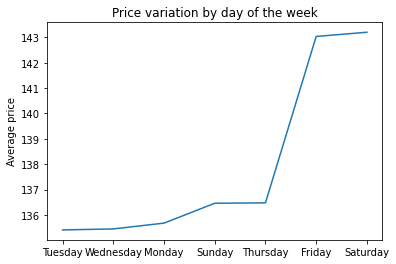

In [36]:
plt.plot(s1)
plt.title('Price variation by day of the week')
plt.ylabel('Average price')
plt.show()

In [319]:
#It can be seen that average prices are highest on Fridays and Saturdays, and lowest on Tuesdays and Wednesdays
#Let's check whether the price variation is any different during the months of July and Aug when the overall prices are highest

In [38]:
df.head(2)

,listing_id,date,available,price,Dayofweek,Dayofweek1
0,241032,2016-01-04,t,85.0,0,Monday
1,241032,2016-01-05,t,85.0,1,Tuesday


In [39]:
df.shape

(934542, 6)

Subsetting the data for just the months of July and Aug 2016

In [40]:
df_July_Aug = df[df['date'] >= '2016-07-01']
df_July_Aug = df_July_Aug[df_July_Aug['date'] <= '2016-08-31']

In [41]:
df_July_Aug.shape

(150569, 6)

In [42]:
df_July_Aug.head(3)

,listing_id,date,available,price,Dayofweek,Dayofweek1
179,241032,2016-07-01,t,85.0,4,Friday
180,241032,2016-07-02,t,85.0,5,Saturday
181,241032,2016-07-03,t,85.0,6,Sunday


In [43]:
df_July_Aug['date'].max()

Timestamp('2016-08-31 00:00:00')

In [44]:
df_July_Aug['date'].min()

Timestamp('2016-07-01 00:00:00')

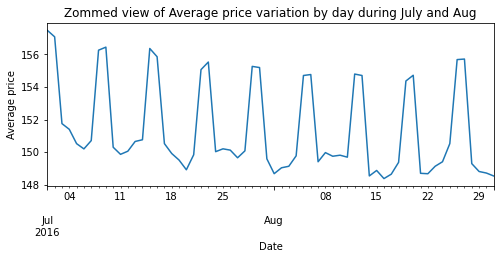

In [45]:
s_July_Aug = df_July_Aug.groupby('date').mean()['price']
plt.figure(figsize = (8, 3))
#plt.plot(s_July_Aug)
s_July_Aug.plot()
plt.xlabel('Date')
plt.ylabel('Average price')
plt.title('Zommed view of Average price variation by day during July and Aug')
plt.show()

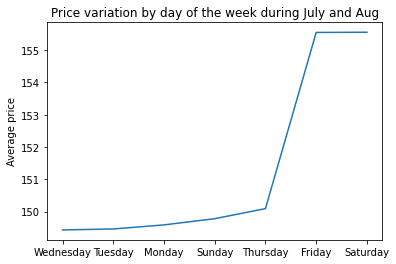

In [46]:
s2 = df_July_Aug.groupby('Dayofweek1').mean()['price'].sort_values()
plt.plot(s2)
plt.title('Price variation by day of the week during July and Aug')
plt.ylabel('Average price')
plt.show()

In [47]:
#So, it can be seen that just like for the complete year's data, in July and Aug also the avg. price is highest on Fridays
#and Saturdays

##### 2. How have the total number of bookings increased over time?

In the absense of bookings information we will use the number of reviews submitted by users as a proxy for number of bookings
Hence, we will use the 'reviews' data for this part of the analysis

In [320]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [49]:
reviews.shape

(84849, 6)

In [50]:
for i in reviews.columns:
    print("# distinct values in", i,"is:", reviews[i].nunique())

# distinct values in listing_id is: 3191
# distinct values in id is: 84849
# distinct values in date is: 1930
# distinct values in reviewer_id is: 75730
# distinct values in reviewer_name is: 14380
# distinct values in comments is: 84136


In [53]:
a = reviews.groupby('date').count()['id']

In [54]:
type(a)

pandas.core.series.Series

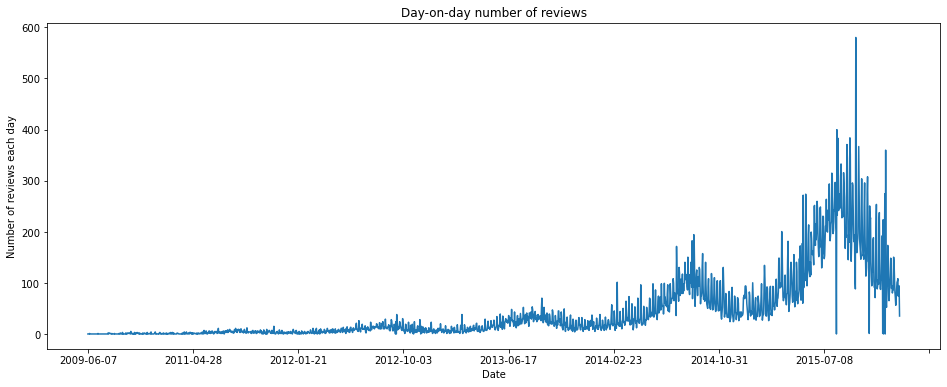

In [58]:
plt.figure(figsize = (16, 6))
a.plot()
plt.xlabel('Date')
plt.ylabel('Number of reviews each day')
plt.title('Day-on-day number of reviews')
plt.show()

In [323]:
#Hence, the number of reviews have increased substantially since 2009 to 2015. Since, the entire data is from a 
#long time back (2009), let's take a closer look at more recent data (from 2015 onwards) 

In [65]:
reviews_after2015 = reviews[reviews['date'] >= '2015-01-01']

In [66]:
reviews_after2015.shape

(52716, 6)

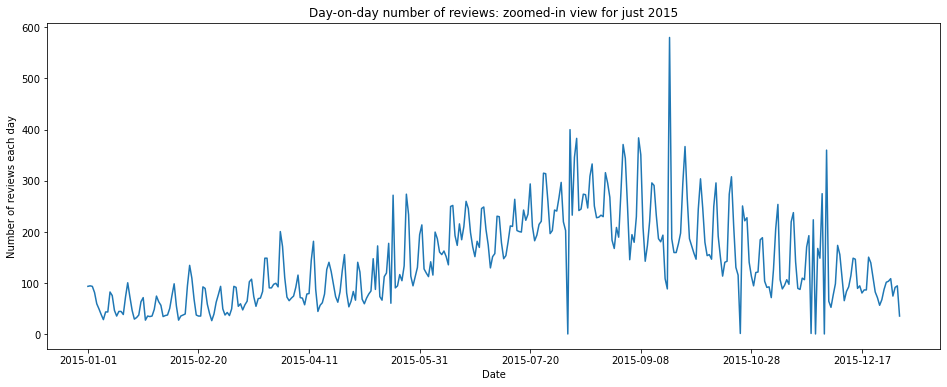

In [324]:
b = reviews_after2015.groupby('date').count()['id']
plt.figure(figsize = (16, 6))
b.plot()
plt.xlabel('Date')
plt.ylabel('Number of reviews each day')
plt.title('Day-on-day number of reviews: zoomed-in view for just 2015')
plt.show()

In [325]:
#From the above plot, it is clear that number of reviews (and probably bookings) are higher in the months of July and Aug

##### 3. What factors have the highest correlation with price of Airbnb Seattle hotels?

For this part of the analysis, we will use the listings data

In [70]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [71]:
listings.shape

(3818, 92)

In [72]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [73]:
listings['price'].dtypes

dtype('O')

In [74]:
#It looks like all the amount variables are of object type. So, to do further analysis, we will convert them 
#into numeric fields

In [79]:
listings[['id', 'listing_url']].head(2)

,id,listing_url
0,241032,https://www.airbnb.com/rooms/241032
1,953595,https://www.airbnb.com/rooms/953595


In [88]:
#As by looking at the top two rows of listings data, we are not able to see all the columns together, we will look at them
#separately to find out which ones have '$' in them
for i in listings.columns:
    print(listings[['id', i]].head(2),"\n")

       id      id
0  241032  241032
1  953595  953595 

       id                          listing_url
0  241032  https://www.airbnb.com/rooms/241032
1  953595  https://www.airbnb.com/rooms/953595 

       id       scrape_id
0  241032  20160104002432
1  953595  20160104002432 

       id last_scraped
0  241032   2016-01-04
1  953595   2016-01-04 

       id                                name
0  241032        Stylish Queen Anne Apartment
1  953595  Bright & Airy Queen Anne Apartment 

       id                                            summary
0  241032                                                NaN
1  953595  Chemically sensitive? We've removed the irrita... 

       id                                              space
0  241032  Make your self at home in this charming one-be...
1  953595  Beautiful, hypoallergenic apartment in an extr... 

       id                                        description
0  241032  Make your self at home in this charming one-be...
1  953595  Chemica

In [89]:
#These are the fields which have $ in them:
#price, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people

In [90]:
list1 = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [92]:
for i in list1:
    listings[i] = listings[i].str.replace('$', '')
    listings[i] = listings[i].str.replace(',', '')

In [95]:
for i in list1:
    listings[i] = pd.to_numeric(listings[i], downcast = 'float')

In [103]:
for i in listings.columns:
    print(i, ": ", listings[i].dtypes)

id :  int64
listing_url :  object
scrape_id :  int64
last_scraped :  object
name :  object
summary :  object
space :  object
description :  object
experiences_offered :  object
neighborhood_overview :  object
notes :  object
transit :  object
thumbnail_url :  object
medium_url :  object
picture_url :  object
xl_picture_url :  object
host_id :  int64
host_url :  object
host_name :  object
host_since :  object
host_location :  object
host_about :  object
host_response_time :  object
host_response_rate :  object
host_acceptance_rate :  object
host_is_superhost :  object
host_thumbnail_url :  object
host_picture_url :  object
host_neighbourhood :  object
host_listings_count :  float64
host_total_listings_count :  float64
host_verifications :  object
host_has_profile_pic :  object
host_identity_verified :  object
street :  object
neighbourhood :  object
neighbourhood_cleansed :  object
neighbourhood_group_cleansed :  object
city :  object
state :  object
zipcode :  object
market :  object
s

Checking correlation of each variable against price

In [119]:
a = listings.corrwith(listings['price']).sort_values(ascending = False)
a

price                             1.000000
weekly_price                      0.937861
monthly_price                     0.873450
cleaning_fee                      0.656938
accommodates                      0.652218
bedrooms                          0.627720
beds                              0.589525
square_feet                       0.531752
bathrooms                         0.516424
guests_included                   0.392875
security_deposit                  0.373195
extra_people                      0.127961
host_total_listings_count         0.093962
host_listings_count               0.093962
review_scores_location            0.075069
review_scores_rating              0.055551
review_scores_cleanliness         0.054357
review_scores_accuracy            0.019026
minimum_nights                    0.017297
review_scores_communication       0.012990
review_scores_checkin             0.007877
maximum_nights                   -0.003336
latitude                         -0.008904
availabilit

In [ ]:
#Hence the variables with the highest positive correlation with price are:
#weekly_price                      0.937861
#monthly_price                     0.873450
#cleaning_fee                      0.656938
#accommodates                      0.652218
#bedrooms                          0.627720
#beds                              0.589525
#square_feet                       0.531752
#bathrooms                         0.516424
#guests_included                   0.392875
#security_deposit                  0.373195

#Further, these two variables have a strong negative correlation with price:
#number_of_reviews                -0.124695
#reviews_per_month                -0.218588

Let's check the correlation of each variable with the 'review_scores_rating' variable also in a similar manner

In [108]:
#Correlation of 'review_scores_rating' with other variables
listings.corrwith(listings['review_scores_rating']).sort_values(ascending = False)

review_scores_rating              1.000000
review_scores_value               0.696534
review_scores_cleanliness         0.642882
review_scores_accuracy            0.621257
review_scores_communication       0.540620
review_scores_checkin             0.521813
review_scores_location            0.368423
square_feet                       0.143793
reviews_per_month                 0.087313
price                             0.055551
monthly_price                     0.048595
weekly_price                      0.045262
bathrooms                         0.045101
security_deposit                  0.044818
id                                0.039246
number_of_reviews                 0.036242
host_id                           0.027348
bedrooms                          0.023257
minimum_nights                    0.001392
beds                             -0.000720
guests_included                  -0.001430
cleaning_fee                     -0.004991
accommodates                     -0.013101
maximum_nig

In [ ]:
#Hence the variables with the highest positive correlation with price are:
#review_scores_value               0.696534
#review_scores_cleanliness         0.642882
#review_scores_accuracy            0.621257
#review_scores_communication       0.540620
#review_scores_checkin             0.521813
#review_scores_location            0.368423

#Further, these two variables have a strong negative correlation with price:
#host_total_listings_count        -0.109357
#host_listings_count              -0.109357
#calculated_host_listings_count   -0.219280

Let's try to built a preditive model using all the variables to predict price of a listing

In [127]:
for i in listings.columns:
    print(i, ":", listings[i].dtypes)

id : int64
listing_url : object
scrape_id : int64
last_scraped : object
name : object
summary : object
space : object
description : object
experiences_offered : object
neighborhood_overview : object
notes : object
transit : object
thumbnail_url : object
medium_url : object
picture_url : object
xl_picture_url : object
host_id : int64
host_url : object
host_name : object
host_since : object
host_location : object
host_about : object
host_response_time : object
host_response_rate : object
host_acceptance_rate : object
host_is_superhost : object
host_thumbnail_url : object
host_picture_url : object
host_neighbourhood : object
host_listings_count : float64
host_total_listings_count : float64
host_verifications : object
host_has_profile_pic : object
host_identity_verified : object
street : object
neighbourhood : object
neighbourhood_cleansed : object
neighbourhood_group_cleansed : object
city : object
state : object
zipcode : object
market : object
smart_location : object
country_code : obje

We plan to built a Linear Regression model, and for that we need to create dummy variables corresponding to the categorical 
variables. So, let's keep the numeric and categorical variables in separate datasets

In [130]:
listings_num = listings.select_dtypes(include = ['int64', 'float64', 'float32'])

In [131]:
listings.shape

(3818, 92)

In [132]:
listings_num.shape

(3818, 36)

In [133]:
listings_num.head(2)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48


In [134]:
listings_char = listings.select_dtypes(include = ['object'])

In [136]:
listings_char.head(1)

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f


In [137]:
listings_char.shape

(3818, 56)

In [138]:
listings_num.shape

(3818, 36)

In [139]:
listings.shape

(3818, 92)

As there are very few data points for a model, we don't want to have too many dummy varaibles created from the categorical variables. So, let's select those which we think can be important

In [146]:
for i in listings_char.columns:
    print("#distinct categories in", i, "is:", listings_char[i].nunique())

#distinct categories in listing_url is: 3818
#distinct categories in last_scraped is: 1
#distinct categories in name is: 3792
#distinct categories in summary is: 3478
#distinct categories in space is: 3119
#distinct categories in description is: 3742
#distinct categories in experiences_offered is: 1
#distinct categories in neighborhood_overview is: 2506
#distinct categories in notes is: 1999
#distinct categories in transit is: 2574
#distinct categories in thumbnail_url is: 3498
#distinct categories in medium_url is: 3498
#distinct categories in picture_url is: 3818
#distinct categories in xl_picture_url is: 3498
#distinct categories in host_url is: 2751
#distinct categories in host_name is: 1466
#distinct categories in host_since is: 1380
#distinct categories in host_location is: 120
#distinct categories in host_about is: 2011
#distinct categories in host_response_time is: 4
#distinct categories in host_response_rate is: 45
#distinct categories in host_acceptance_rate is: 2
#distinct c

In [149]:
listings_char.head(1)

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f


We will create dummy variables for only the below categorical variables as other have very high number of 
distinct categories (>20)

In [154]:
list1 = ["host_acceptance_rate",	"host_is_superhost",	"host_has_profile_pic",	"host_identity_verified",	"state",	"is_location_exact",	"instant_bookable",	"require_guest_profile_picture",	"require_guest_phone_verification",	"room_type",	"cancellation_policy",	"host_response_time",	"bed_type",	"city",	"smart_location",	"property_type",	"neighbourhood_group_cleansed",	"zipcode"]

In [160]:
for i in list1:
    print(i, ":", listings_char[i].unique(), "\n")

host_acceptance_rate : ['100%' nan '0%'] 

host_is_superhost : ['f' 't' nan] 

host_has_profile_pic : ['t' 'f' nan] 

host_identity_verified : ['t' 'f' nan] 

state : ['WA' 'wa'] 

is_location_exact : ['t' 'f'] 

instant_bookable : ['f' 't'] 

require_guest_profile_picture : ['f' 't'] 

require_guest_phone_verification : ['f' 't'] 

room_type : ['Entire home/apt' 'Private room' 'Shared room'] 

cancellation_policy : ['moderate' 'strict' 'flexible'] 

host_response_time : ['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more'] 

bed_type : ['Real Bed' 'Futon' 'Pull-out Sofa' 'Airbed' 'Couch'] 

city : ['Seattle' 'Ballard, Seattle' 'West Seattle' 'Seattle ' '西雅图'
 'Phinney Ridge Seattle' 'seattle'] 

smart_location : ['Seattle, WA' 'Ballard, Seattle, WA' 'West Seattle, WA' 'Seattle , WA'
 '西雅图, WA' 'Phinney Ridge Seattle, WA' 'seattle, wa'] 

property_type : ['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Bed & Breakf

In [161]:
listings_char1 = listings_char[["host_acceptance_rate",	"host_is_superhost",	"host_has_profile_pic",	"host_identity_verified",	"state",	"is_location_exact",	"instant_bookable",	"require_guest_profile_picture",	"require_guest_phone_verification",	"room_type",	"cancellation_policy",	"host_response_time",	"bed_type",	"city",	"smart_location",	"property_type",	"neighbourhood_group_cleansed",	"zipcode"]]

In [162]:
listings_char.shape

(3818, 56)

In [164]:
listings_char1.shape

(3818, 18)

In [166]:
listings_num['price'].count()

3818

In [167]:
listings_num.shape

(3818, 36)

In [ ]:
# So, there are no missing values in price variable

In [184]:
#Let's calculate % missing values in each numeric variable and each categorical variable
for i in listings_num:
    print(i, ":", 100 - (listings_num[i].count()/listings_num.shape[0])*100)

id : 0.0
scrape_id : 0.0
host_id : 0.0
host_listings_count : 0.05238344683080243
host_total_listings_count : 0.05238344683080243
latitude : 0.0
longitude : 0.0
accommodates : 0.0
bathrooms : 0.4190675746464194
bedrooms : 0.15715034049240728
beds : 0.02619172341540832
square_feet : 97.45940282870613
price : 0.0
weekly_price : 47.38082765845992
monthly_price : 60.26715557883709
security_deposit : 51.12624410686223
cleaning_fee : 26.977475117862753
guests_included : 0.0
extra_people : 0.0
minimum_nights : 0.0
maximum_nights : 0.0
availability_30 : 0.0
availability_60 : 0.0
availability_90 : 0.0
availability_365 : 0.0
number_of_reviews : 0.0
review_scores_rating : 16.946045049764265
review_scores_accuracy : 17.234154007333686
review_scores_cleanliness : 17.103195390256673
review_scores_checkin : 17.234154007333686
review_scores_communication : 17.050811943425884
review_scores_location : 17.155578837087475
review_scores_value : 17.181770560502883
license : 100.0
calculated_host_listings_cou

In [191]:
#Dropping variables with more than 40% values as missing
listings_num1 = listings_num.drop(['license', 'square_feet', 'monthly_price', 'security_deposit', 'weekly_price'], axis = 1)

In [192]:
listings_num.shape

(3818, 36)

In [193]:
listings_num1.shape

(3818, 31)

In [194]:
#Let's calculate % missing values in each numeric variable and each categorical variable
for i in listings_char:
    print(i, ":", 100 - (listings_char[i].count()/listings_char.shape[0])*100)

listing_url : 0.0
last_scraped : 0.0
name : 0.0
summary : 4.635935044525922
space : 14.903090623363013
description : 0.0
experiences_offered : 0.0
neighborhood_overview : 27.029858564693555
notes : 42.06390780513358
transit : 24.46306966998428
thumbnail_url : 8.381351492928232
medium_url : 8.381351492928232
picture_url : 0.0
xl_picture_url : 8.381351492928232
host_url : 0.0
host_name : 0.05238344683080243
host_since : 0.05238344683080243
host_location : 0.2095337873231955
host_about : 22.498690413829223
host_response_time : 13.698271346254586
host_response_rate : 13.698271346254586
host_acceptance_rate : 20.24620220010476
host_is_superhost : 0.05238344683080243
host_thumbnail_url : 0.05238344683080243
host_picture_url : 0.05238344683080243
host_neighbourhood : 7.857517024620222
host_verifications : 0.0
host_has_profile_pic : 0.05238344683080243
host_identity_verified : 0.05238344683080243
street : 0.0
neighbourhood : 10.895756940806706
neighbourhood_cleansed : 0.0
neighbourhood_group_c

In [195]:
#Distinct values taken by each numeric variable
for i in listings_num1.columns:
    print("#distinct values in", i, "is:", listings_num1[i].nunique())

#distinct values in id is: 3818
#distinct values in scrape_id is: 1
#distinct values in host_id is: 2751
#distinct values in host_listings_count is: 27
#distinct values in host_total_listings_count is: 27
#distinct values in latitude is: 3818
#distinct values in longitude is: 3818
#distinct values in accommodates is: 15
#distinct values in bathrooms is: 12
#distinct values in bedrooms is: 8
#distinct values in beds is: 11
#distinct values in price is: 273
#distinct values in cleaning_fee is: 118
#distinct values in guests_included is: 15
#distinct values in extra_people is: 45
#distinct values in minimum_nights is: 22
#distinct values in maximum_nights is: 68
#distinct values in availability_30 is: 31
#distinct values in availability_60 is: 61
#distinct values in availability_90 is: 91
#distinct values in availability_365 is: 363
#distinct values in number_of_reviews is: 195
#distinct values in review_scores_rating is: 42
#distinct values in review_scores_accuracy is: 7
#distinct value

In [196]:
#So, dropping the variable scrape_id as it takes only 1 distinct value
listings_num1 = listings_num1.drop(['scrape_id'], axis = 1)

In [197]:
listings_num1.shape

(3818, 30)

In [ ]:
#All categorial variables have at least 50% values present; so, we will not drop any of those

Creating dummy variables for the categorical variables

In [207]:
listings_char2 = pd.get_dummies(listings_char1, dummy_na = True, drop_first = False)

In [208]:
listings_char1.shape

(3818, 18)

In [209]:
listings_char2.shape

(3818, 126)

In [210]:
for i in listings_char2.columns:
    print(i)

host_acceptance_rate_0%
host_acceptance_rate_100%
host_acceptance_rate_nan
host_is_superhost_f
host_is_superhost_t
host_is_superhost_nan
host_has_profile_pic_f
host_has_profile_pic_t
host_has_profile_pic_nan
host_identity_verified_f
host_identity_verified_t
host_identity_verified_nan
state_WA
state_wa
state_nan
is_location_exact_f
is_location_exact_t
is_location_exact_nan
instant_bookable_f
instant_bookable_t
instant_bookable_nan
require_guest_profile_picture_f
require_guest_profile_picture_t
require_guest_profile_picture_nan
require_guest_phone_verification_f
require_guest_phone_verification_t
require_guest_phone_verification_nan
room_type_Entire home/apt
room_type_Private room
room_type_Shared room
room_type_nan
cancellation_policy_flexible
cancellation_policy_moderate
cancellation_policy_strict
cancellation_policy_nan
host_response_time_a few days or more
host_response_time_within a day
host_response_time_within a few hours
host_response_time_within an hour
host_response_time_nan
be

In [214]:
#Replacing missing values in numeric varaibles with mean
listings_num1.head(10)

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,953595,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
2,3308979,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15
3,7421966,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89
5,5956968,326758,1.0,1.0,47.630525,-122.366174,2,1.0,1.0,1.0,...,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.45
6,1909058,2497928,1.0,1.0,47.636605,-122.368519,2,1.0,1.0,1.0,...,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.46
7,856550,4016632,5.0,5.0,47.640161,-122.375856,2,1.0,1.0,1.0,...,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,5,4.73
8,4948745,2166277,1.0,1.0,47.632410,-122.357216,2,1.0,1.0,1.0,...,8,97.0,10.0,9.0,10.0,9.0,10.0,10.0,1,1.22
9,2493658,5177328,6.0,6.0,47.637492,-122.366889,4,1.0,1.0,1.0,...,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,6,1.55


In [218]:
f = lambda i: i.fillna(i.mean())
listings_num2 = listings_num1.apply(f, axis = 0)
listings_num2.head(10)

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,...,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2,4.070000
1,953595,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,...,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6,1.480000
2,3308979,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,...,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2,1.150000
3,7421966,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,...,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919
4,278830,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,...,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,0.890000
5,5956968,326758,1.0,1.0,47.630525,-122.366174,2,1.0,1.0,1.0,...,17,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,2.450000
6,1909058,2497928,1.0,1.0,47.636605,-122.368519,2,1.0,1.0,1.0,...,58,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,2.460000
7,856550,4016632,5.0,5.0,47.640161,-122.375856,2,1.0,1.0,1.0,...,173,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,5,4.730000
8,4948745,2166277,1.0,1.0,47.632410,-122.357216,2,1.0,1.0,1.0,...,8,97.000000,10.000000,9.000000,10.000000,9.000000,10.000000,10.000000,1,1.220000
9,2493658,5177328,6.0,6.0,47.637492,-122.366889,4,1.0,1.0,1.0,...,32,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,6,1.550000


In [229]:
listings_num2.shape

(3818, 30)

In [230]:
listings_char2.shape

(3818, 126)

In [231]:
comb = pd.concat([listings_num2, listings_char2], axis = 1)

In [232]:
comb.shape

(3818, 156)

In [233]:
comb.head(2)

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99\n98122,zipcode_nan
0,241032,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,953595,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
for i in comb.columns:
    print(i)

id
host_id
host_listings_count
host_total_listings_count
latitude
longitude
accommodates
bathrooms
bedrooms
beds
price
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
availability_30
availability_60
availability_90
availability_365
number_of_reviews
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
calculated_host_listings_count
reviews_per_month
host_acceptance_rate_0%
host_acceptance_rate_100%
host_acceptance_rate_nan
host_is_superhost_f
host_is_superhost_t
host_is_superhost_nan
host_has_profile_pic_f
host_has_profile_pic_t
host_has_profile_pic_nan
host_identity_verified_f
host_identity_verified_t
host_identity_verified_nan
state_WA
state_wa
state_nan
is_location_exact_f
is_location_exact_t
is_location_exact_nan
instant_bookable_f
instant_bookable_t
instant_bookable_nan
require_guest_profile_picture_f
require_guest_profile_picture_t
require_guest_pr

Keeping dependent variable into 'y' and the indepdent variables into 'X'

In [326]:
y = comb['price']

In [327]:
X = comb.drop(['price', 'id', 'host_id'], axis = 1)

In [328]:
X.shape

(3818, 153)

In [329]:
X.head(2)

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,...,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99\n98122,zipcode_nan
0,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,61.710903,2,...,0,0,0,0,0,0,0,0,0,0
1,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,40.000000,1,...,0,0,0,0,0,0,0,0,0,0


In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [331]:
model = LinearRegression(normalize = True)

In [332]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [333]:
model

LinearRegression(normalize=True)

In [334]:
pred_train = model.predict(X_train)

In [335]:
r2_score(y_train, pred_train)

0.6026153227418978

In [336]:
import statsmodels.api as sm

In [337]:
model1 = sm.OLS(y_train, X_train)

In [338]:
results = model1.fit()

In [339]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     43.06
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:14:09   Log-Likelihood:                -16594.
No. Observations:                3054   AIC:                         3.342e+04
Df Residuals:                    2940   BIC:                         3.410e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

C:\Users\praj\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\praj\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [340]:
#Currently the model gives a R-square value of 60% on the training data 
#This model has many statistically insignificant variables as their p-value is > 0.05 and those can be dropped 
#to improve the model